In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# import paired ttest
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

# needed for editable text in svg format
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'

# import homemade functions:
from MAPseq_processing import *
from MAPseq_plotting import *

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


# simulation 2 areas
- you have two areas A, B
- where P(A) = 0.9, P(B) = 0.1
- areas are indpendent
- Let's say we have 1000 neurons

In [196]:
true_ntot = 1000
trials = 500
# pa = 0.9
# pb = 0.1

pa_series = [0.6, 0.7, 0.8, 0.9] # didn't work w/ pa=0.5

pb_series = [0.01, 0.1, 0.15, 0.5, 0.9]

stds = []

results = pd.DataFrame(columns=["p(A)", "p(B)", "n_tot_mu", "n_tot_sigma", "trials"])

i=0
for pa in pa_series:
    for pb in pb_series:

        n_tots = []
        for rs in range(trials):
                
            a = [1]*int(pa*true_ntot) + [0]*int((1-pa)*true_ntot)
            b = [1]*int(pb*true_ntot) + [0]*int((1-pb)*true_ntot)
            a_shuffle = pd.Series(a).sample(frac=1, ignore_index=True, random_state=rs)
            b_shuffle = pd.Series(b).sample(frac=1, ignore_index=True, random_state=rs+500)
            test = pd.DataFrame({"A":a_shuffle, "B":b_shuffle})
            n0_idx = test.sum(axis=1)>0
            test_n0 = test[n0_idx].reset_index(drop=True)

            # estimate n_total
            ntot = estimate_n_total(test_n0, plot_areas=["A", "B"])
            n_tots.append(ntot)

        mu = np.mean(n_tots)
        sigma = np.std(n_tots)

        results.loc[i] = [pa, pb, mu, sigma, trials]

        i+=1

results


,p(A),p(B),n_tot_mu,n_tot_sigma,trials
0,0.6,0.01,1094.620,414.332470,500.0
1,0.6,0.10,1005.748,78.867512,500.0
2,0.6,0.15,1001.238,63.183015,500.0
3,0.6,0.50,999.014,25.794065,500.0
4,0.6,0.90,999.378,8.329893,500.0
5,0.7,0.01,1071.938,313.156239,500.0
6,0.7,0.10,1003.364,64.081319,500.0
7,0.7,0.15,1002.082,50.852643,500.0
8,0.7,0.50,999.152,20.615841,500.0
9,0.7,0.90,999.668,6.851407,500.0


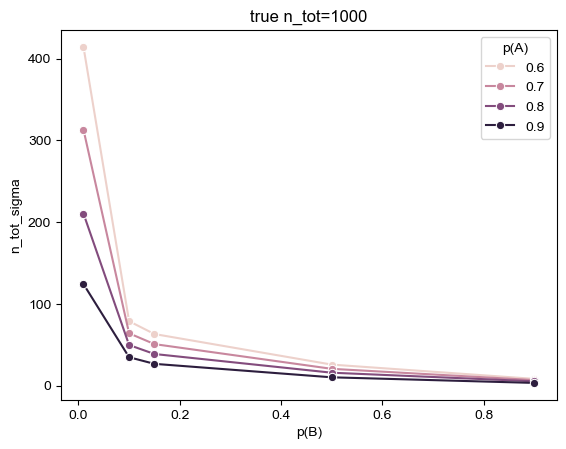

In [205]:
sns.lineplot(results, x="p(B)", y="n_tot_sigma", hue="p(A)", marker="o")
plt.title("true n_tot=1000")
plt.show()

In [195]:
fig, axs = plt.subplots(1,5)

i = 0

for ax in axs.flat:
    pa = pa_series[i]
    plot = results[results["p(A)"]==pa]
    

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:

        



plt.hist(n_tots)
plt.xlabel("estimated n_total")
plt.ylabel("freq")
plt.title("p(A):"+str(pa)+" P(B):"+str(pb))
mu = np.mean(n_tots)
median = np.median(n_tots)
sigma = np.std(n_tots)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))
ax = plt.gca()
plt.text(0.01, 0.95, textstr, transform = ax.transAxes,
                verticalalignment='top')
plt.show()

In [187]:
test = pd.DataFrame(columns=["p(A)", "p(B)", "n_tot_mu", "n_tot_sigma", "trials"])
test.loc[0] = [1,2,3,4,5]
test

,p(A),p(B),n_tot_mu,n_tot_sigma,trials
0,1,2,3,4,5


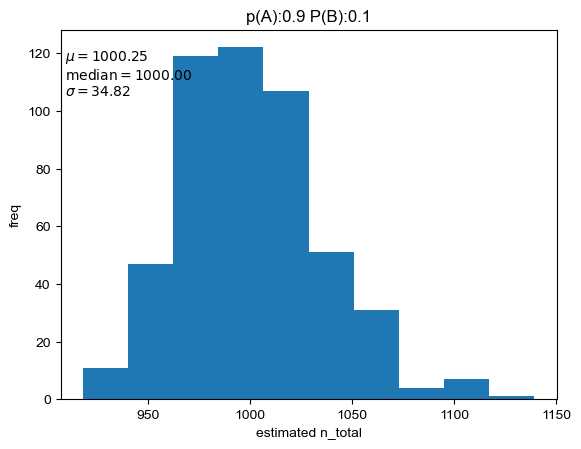